## Ejercicio 1

Se fabrican piezas de tipo A y B que pasan por un proceso de:

1.   Estampado (se estampan 2 partes iguales, se usa el doble de insumos)
2.   Soldado
3. Pintado

Los insumos de equipos para la realización de cada una de las operaciones (en segundos por pieza) son:

| Op |  A  |  B  | Tiempo disp. |
|--- |:---:|:---:|:------------:|
| 1  |  3  |  8  |  48000       |
| 2  | 12  |  6  |  42000       |
| 3  | 9   |  9  |  36000       |

La utilidad unitaria es de $4 para la pieza A y 3 para la pieza B. 

Se desea establecer el programa semanal de producción que **maximice la utilidad del taller** con respecto a las piezas consideradas. 



Planteo entonces las inecuaciones para cada proceso, llamando $a$ a las piezas de tipo A y $b$ a las de tipo B. Como en estampado se procesan 2 insumos para cada pieza final, duplico los tiempos de la operación

> Estampado:  $ 6.a + 16.b ≤ 48000 $

> Soldado: $ 12.a + 6.b ≤ 42000 $

> Pintado: $ 9.a + 9.b ≤ 36000 $


### Resolución gráfica

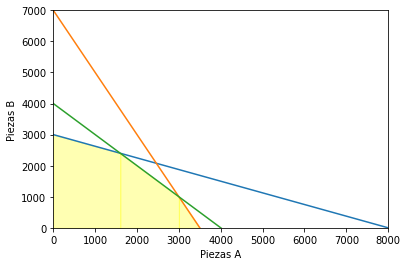

In [ ]:
import matplotlib.pyplot as plt

def f1(a): #Estampado
  return 3000 - 0.375*a

def f2(a): #Soldado
  return 7000 - 2*a

def f3(a): #Pintado
  return 4000 - a

a = range(0, 8000)

plt.plot(a, [f1(i) for i in a])
plt.plot(a, [f2(i) for i in a])
plt.plot(a, [f3(i) for i in a])

plt.xlim(0, 8000)
plt.ylim(0, 7000)
plt.xlabel('Piezas A')
plt.ylabel('Piezas B')

#para mejorar
plt.fill_between([0, 1600], [3000, 2400], color = 'yellow', alpha = 0.3)
plt.fill_between([1600, 3000], [2400, 1000], color = 'yellow', alpha = 0.3)
plt.fill_between([3000, 3500], [1000, 0], color = 'yellow', alpha = 0.3)

plt.show()

Se maximiza en 3000, 1000

### Programación lineal

Código de clase

In [ ]:
z_best = -1000
a_best = 0
b_best = 0
for a in range (0, 8000):
  for b in range (0, 7000):
    if 6*a + 16*b <= 48000 and 12*a + 6*b <= 42000 and 9*a + 9*b <= 36000:
      z = 4*a + 3*b
      if z > z_best:
        z_best = z
        a_best = a
        b_best = b
print('El máximo beneficio es de $', z_best, 'y se da para', a_best, 
      'unidades de A y', b_best, 'unidades de B')

El máximo beneficio es de $ 15000 y se da para 3000 unidades de A y 1000 unidades de B


Código del Chat GPT

In [ ]:
!pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 71.1 MB/s eta 0:00:00


In [ ]:
# Importar la biblioteca PuLP
import pulp as pl

# Crear un problema de maximización
prob = pl.LpProblem('Maximización', pl.LpMaximize)

# Definir las variables de decisión
A = pl.LpVariable('A', lowBound=0, cat='Continuous')
B = pl.LpVariable('B', lowBound=0, cat='Continuous')

# Definir la función objetivo
prob += 4 * A + 3 * B

# Definir las restricciones
prob += 6 * A + 16 * B <= 48000
prob += 12 * A + 6 * B <= 42000
prob += 9 * A + 9 * B <= 36000

# Resolver el problema
prob.solve()

# Imprimir el resultado
print("Status: ", pl.LpStatus[prob.status])
print("Valor de A = ", pl.value(A))
print("Valor de B = ", pl.value(B))
print("Valor óptimo de Z = ", pl.value(prob.objective))

Status:  Optimal
Valor de A =  3000.0
Valor de B =  1000.0
Valor óptimo de Z =  15000.0






---





## Ejercicio 2

Un fabricante entrega cajas de bombones de un kilogramo, de variedades A y B. 

Cada variedad de caja tiene la siguiente cantidad de bombones (en gramos):

|Tipo |  A  |  B  |Disponible|
|:---:|:---:|:---:|:--------:|
|Licor| 300 | 400 | 100000   |
|Nuez | 500 | 200 | 120000   |
|Fruta| 200 | 400 | 100000   |

La utilidad por cada caja tipo A es de $120 y de 90 para tipo B. 

Se pide definir la cantidad de cajas de cada tipo que debe armar en esta situación, para que su **beneficio sea máximo**. 

Las inecuaciones del problema se plantean como

> Licor: $ 300.a + 400.b ≤ 100000 $

> Nuez: $ 500.a + 200.b ≤ 120000 $

> Fruta: $ 200.a + 400.b ≤ 100000 $

### Resolución gráfica

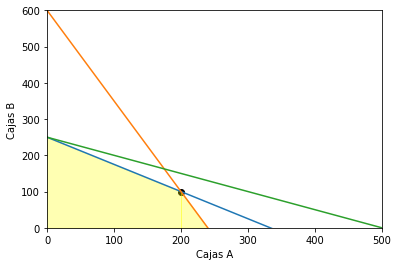

In [ ]:
import matplotlib.pyplot as plt

def f1(a): #Licor
  return 250 - 0.75*a

def f2(a): #Nuez
  return 600 - 2.5*a

def f3(a): #Fruta
  return 250 - 0.5*a

a = range(0, 500)

plt.plot(a, [f1(i) for i in a])
plt.plot(a, [f2(i) for i in a])
plt.plot(a, [f3(i) for i in a])
plt.scatter(200,100, color = 'black')

plt.xlim(0, 500)
plt.ylim(0, 600)
plt.xlabel('Cajas A')
plt.ylabel('Cajas B')

plt.fill_between([0, 200], [250, 100], color = 'yellow', alpha = 0.3)
plt.fill_between([200, 240], [100, 0], color = 'yellow', alpha = 0.3)

plt.show()

Se puede ver en el gráfico que el punto máximo es para **200 cajas de A y 100 cajas de B**. Si la función de maximización es:


> MAX: $Z = 120.A + 90.B$

Entonces, para el punto máximo de la gráfica, resulta **Z = 33.000**



### Programación lineal

In [ ]:
z_best = -1000
a_best = 0
b_best = 0
for a in range (0, 500):
  for b in range (0, 600):
    if 300*a + 400.*b <= 100000 and 500*a + 200*b <= 120000 and 200*a + 400*b <= 100000:
      z = 120*a + 90*b
      if z > z_best:
        z_best = z
        a_best = a
        b_best = b
print('El máximo beneficio es de $', z_best, 'y se da para', a_best, 
      'unidades de A y', b_best, 'unidades de B')

El máximo beneficio es de $ 33000 y se da para 200 unidades de A y 100 unidades de B




---



## Ejercicio 5

Se desea definir las cantidades a fabricar dos productos A y B.

Se presentan los tiempos unitarios de cada producto en cada máquina:

| Maq | A | B  | Disp |
|:---:|:-:|:--:|:----:|
| 1   | 1 | 0.4| 200|
| 2   | 0.5| -|200|

El márgen bruto unitario para A es de 12 y para B de 8. 

Se pide optimizar el margen total. 

Planteo las inecuaciones teniendo en cuenta las restricciones que da el ejercicio:


> $a ≥ 50$


> $b ≥ 4.a$


> $a + 0,4.b ≤ 200$


> $0,5.a ≤  200 $

Y esta última ecuación puede escribirse como:


> $ a ≤ 400 $

### Programación lineal

In [ ]:
z_best = -1000
a_best = 0
b_best = 0
for a in range (50, 400):
  for b in range (0, 500):
    if 4*a - b <= 0 and a + 0.4*b <= 200:
      z = 12*a + 8*b
      if z > z_best:
        z_best = z
        a_best = a
        b_best = b
print('El máximo beneficio es de $', z_best, 'y se da para', a_best, 
      'unidades de A y', b_best, 'unidades de B')

El máximo beneficio es de $ 3600 y se da para 50 unidades de A y 375 unidades de B


### Resolución gráfica

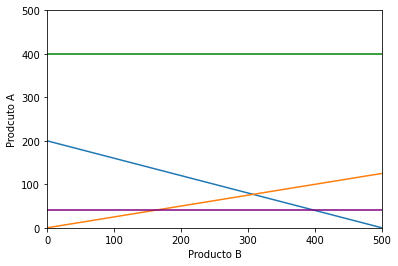

In [ ]:
import matplotlib.pyplot as plt

def f1(b): #Maquina 1
  return 200 - 0.4*b

def f2(b): #Produccion B
  return 0.25*b

b = range(0, 500)

plt.plot(b, [f1(i) for i in b])
plt.plot(b, [f2(i) for i in b])
plt.hlines(y = 400, xmin = 0, xmax = 500, color = 'green')
plt.hlines(y = 40, xmin = 0, xmax = 500, color = 'purple')

plt.xlim(0, 500)
plt.ylim(0, 500)
plt.xlabel('Producto B')
plt.ylabel('Prodcuto A')

plt.show()

Grafico nuevamente quitando la restricción de $ a ≤ 400 $, ya que me queda muy por fuera del area analizada

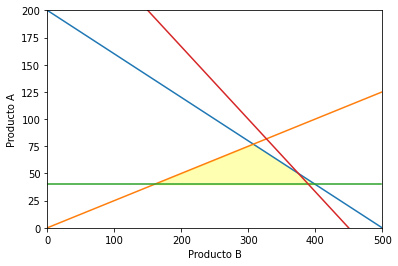

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

b = np.arange(0, 500)

a1 = 200 - 0.4*b
a2 = 0.25*b
a3 = 40 + 0*b
a4 = np.minimum(a1, a2)

plt.plot(b, a1)
plt.plot(b, a2)
plt.plot(b, a3)

plt.xlim(0, 500)
plt.ylim(0, 200)
plt.xlabel('Producto B')
plt.ylabel('Producto A')

plt.fill_between(b, a4, a3, where = a4 >= a3, color = 'yellow', alpha = 0.3)

a_max = 300 - 0.6667*b
plt.plot(b, a_max)
plt.show()

Como calcule la respuesta con programación lineal, puedo ver donde se haya el máximo beneficio. Quizás hubiera sido mejor plantear el problema con variables *slack* para ver donde se cruzaban



---



## Ejercicio 7

Una empresa automotriz fabrica automóviles (A) y camiones (C). La capacidad de producción de cada departamento es:

- Estampado: $A ≤ 25000 $ ó $ C ≤ 40000$
- Motores: $A ≤ 33333 $ ó $ C ≤ 16667$
- Montaje A: $A ≤ 22500$
- Montaje C: $C≤15000$

Además se desea que $ 12000≤A≤18000$  y  $ C≥8000$


Resultan entonces las inecuaciones para el ejercicio:

> $12000≤A≤18000$ 

> $8000≤C≤15000$ 





### Resolución gráfica

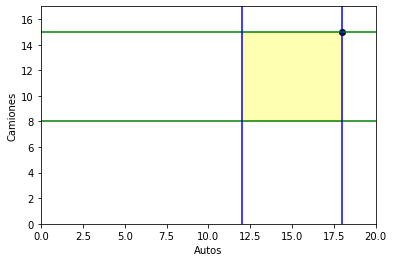

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

c1 = plt.hlines(y = 15, xmin = 0, xmax = 20, color = 'green')
c2 = plt.hlines(y = 8, xmin = 0, xmax = 20, color = 'green')

a1 = plt.vlines(x = 12, ymin = 0, ymax = 17, color = 'blue')
a2 = plt.vlines(x = 18, ymin = 0, ymax = 17, color = 'blue')

x = [12, 12, 18, 18]
y = [8, 15, 15, 8]
plt.fill(x, y, color = 'yellow', alpha = 0.3)
plt.scatter(18, 15, color = 'black')

plt.xlim(0, 20)
plt.ylim(0, 17)
plt.xlabel('Miles de autos')
plt.ylabel('Miles de camiones')
plt.show()

Se ve del gráfico que el punto máximo es en 18000 unidades de automóviles y 15000 unidades de camiones. 

El margen de beneficios es de $15000 por A y de 12500 por C, por lo tanto queda planteado el beneficio total como:


> $Z = 15000.A + 12500.B$

y para que resulte máximo, calculo con las unidades del punto máximo y resulta: **Z = 4575**

### Programación lineal

In [ ]:
# Importamos la biblioteca PuLP
import pulp as pl

# Creamos una instancia de un problema de maximización
problema = pl.LpProblem("Problema de programación lineal", pl.LpMaximize)

# Definimos las variables de decisión
A= pl.LpVariable('A', lowBound=0, cat='Continuous')
C= pl.LpVariable('C', lowBound=0, cat='Continuous')

# Definimos la función objetivo
problema += 15000 * A + 12500 * C

# Definimos las restricciones
problema += C <= 15000
problema += A >= 12000
problema += A <= 18000
problema += C >= 8000

# Resolvemos el problema
problema.solve()

# Imprimir el resultado
print("Status: ", pl.LpStatus[prob.status])
print("Valor de A = ", pl.value(A))
print("Valor de C = ", pl.value(C))
print("Valor óptimo de Z = ", pl.value(prob.objective))

Status:  Optimal
Valor de A =  18000.0
Valor de C =  15000.0
Valor óptimo de Z =  15000.0
